### `import` Packages

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

from matplotlib import pyplot as plt

### Data Reading

In [2]:
agri_df = pd.read_csv(filepath_or_buffer='data/agriculture_data_new.csv')
india_gdf = gpd.read_file(filename='data/india_geo_new/')

In [3]:
agri_df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [4]:
india_gdf.head(2)

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry
0,1,05,Uttrakhand,STATE,066,Nainital,4251.0,954605.0,191383.0,493666.0,460939.0,5.322546e+09,506182.695952,"POLYGON ((79.52659 29.05543, 79.52550 29.05545..."
1,2,05,Uttrakhand,STATE,060,Dehradoon,3088.0,1696694.0,347001.0,892199.0,804495.0,4.177236e+09,578188.681639,"POLYGON ((77.87557 30.26052, 77.87467 30.26087..."


### Data Visualization

In [5]:
def filter_statewise(state_name, df, gdf, show_plot=False, plot_column=None, show_country=False):
    country_gdf = gdf
    available_cols = ['commodity', 'variety', 'min_price', 'max_price', 'modal_price']
    
    if plot_column in available_cols:
        if (plot_column == 'commodity') or (plot_column == 'variety'):
            aggfunc = 'count'
        else:
            aggfunc = 'mean'
    else:
        plot_column = 'modal_price'
        aggfunc = 'mean'
    
    df = df[df['state'] == state_name]
    gdf = gdf[gdf['statename'] == state_name]
    
    df = df[['district', 'market', 'commodity', 'variety', 
             'arrival_date', 'min_price', 'max_price', 'modal_price']]
    gdf = gdf[['distname', 'distarea', 'totalpopul', 'totalhh', 
               'totpopmale', 'totpopfema', 'st_areasha', 'st_lengths', 'geometry']]
    gdf.columns = ['district', 'dist_area', 'popn', 'total_hh','male_popn', 
                   'female_popn', 'st_areasha', 'st_lengths', 'geometry']
    
    state_data = gdf.merge(df, on='district', how='left')
    
    if show_plot:
        if plot_column:
            state_geometry = state_data['geometry']
            state_data_dis = state_data.dissolve(by=['district'], aggfunc=aggfunc)
            
            if show_country:
                fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))
                
                country_gdf_dis = country_gdf.dissolve(by=['statename'], aggfunc='mean')
                country_gdf_dis.plot(column='totalpopul', legend=True, legend_kwds={'shrink': 0.3}, ax=axes[0])
                axes[0].set_title('India; Statewise - Popn')
                
                ax = state_data_dis.plot(color='white', edgecolor='black', ax=axes[1])
                state_data_dis.plot(column=plot_column, legend=True, legend_kwds={'shrink': 0.3}, ax=ax)
                axes[1].set_title('{}; {}'.format(state_name, plot_column))
                
                plt.show()            
            
            else:
                ax = state_data_dis.plot(color='white', edgecolor='black', figsize=(10, 6))
                state_data_dis.plot(column=plot_column, legend=True, legend_kwds={'shrink': 0.3}, ax=ax)
                ax.set_title('{}; {}'.format(state_name, plot_column))
                plt.show()
            
            # commodities
            plt.tight_layout()
            df['commodity'].value_counts().plot(kind='barh')
            plt.title(state_name + '; Commodities')
            plt.show()
            
            # varieties
            plt.tight_layout()
            df['variety'].value_counts().plot(kind='barh')
            plt.title(state_name + '; Varieties')
            plt.show()
            
            return None
        
        return "Requires `plot_column`"
    return state_data

**Andhra Pradesh**

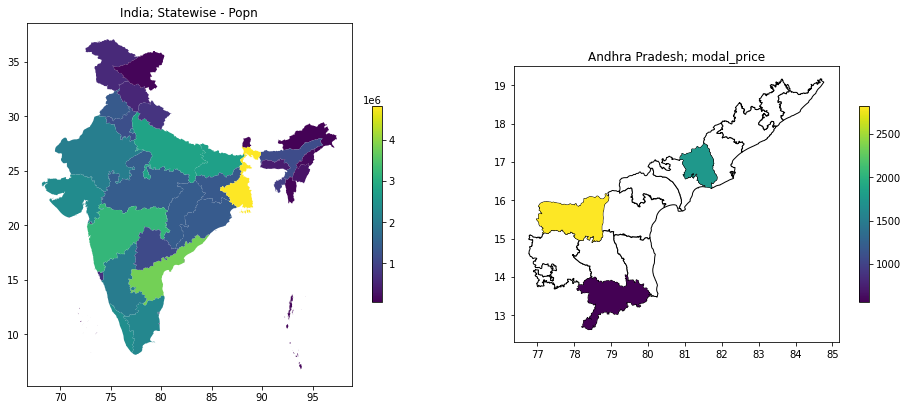

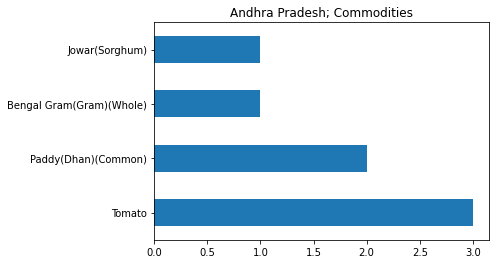

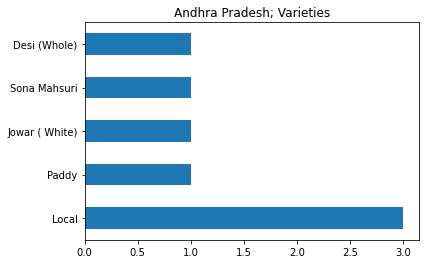

In [6]:
filter_statewise(
    state_name='Andhra Pradesh',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Karnataka**

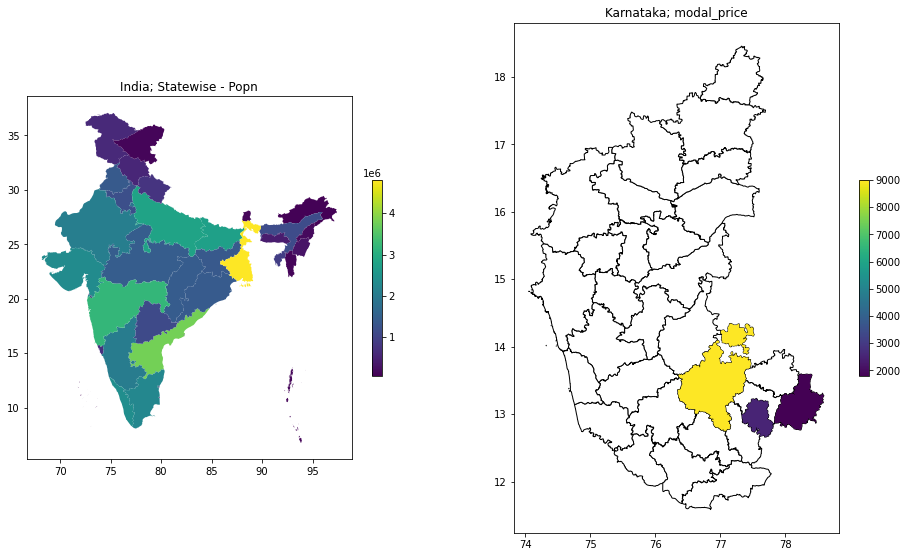

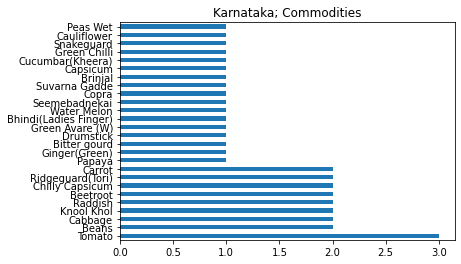

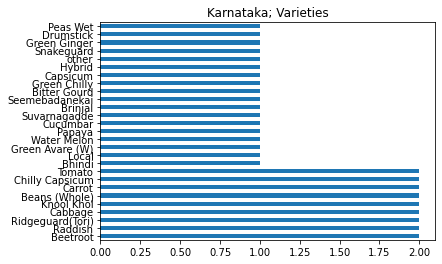

In [7]:
filter_statewise(
    state_name='Karnataka',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Telangana**

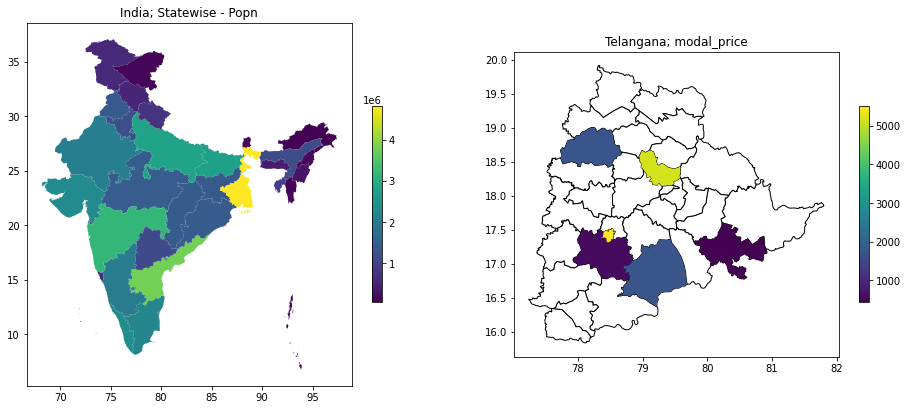

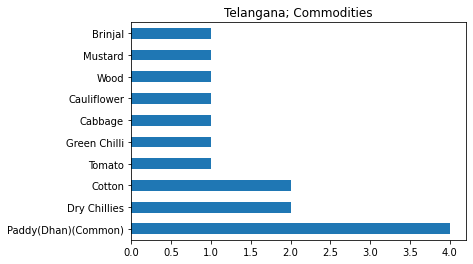

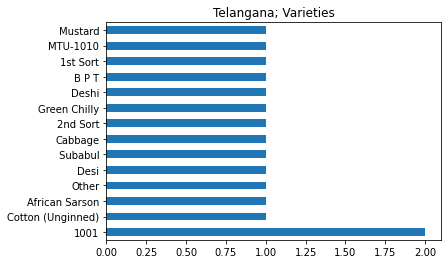

In [8]:
filter_statewise(
    state_name='Telangana',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Tamil Nadu**

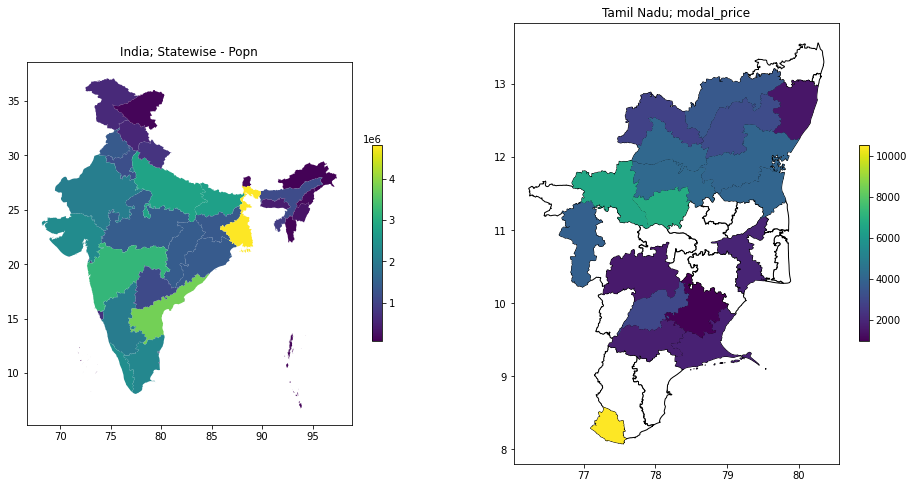

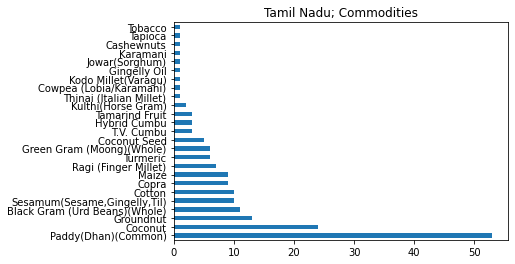

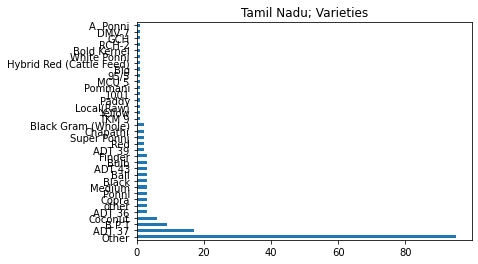

In [9]:
filter_statewise(
    state_name='Tamil Nadu',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)

**Uttar Pradesh**

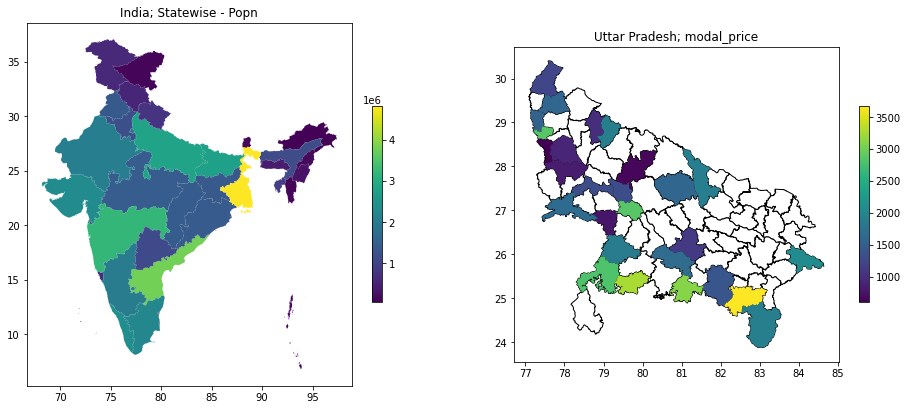

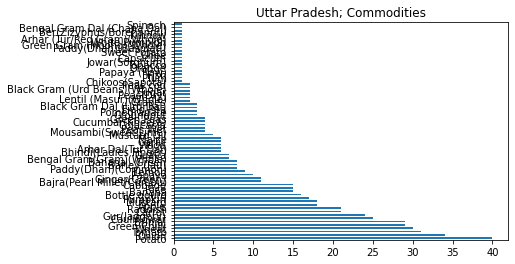

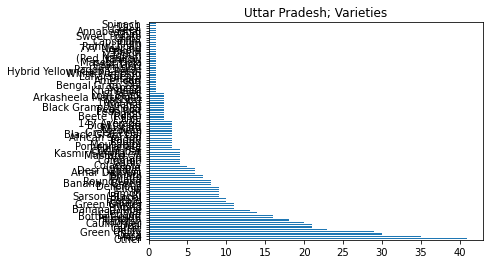

In [10]:
filter_statewise(
    state_name='Uttar Pradesh',
    df=agri_df,
    gdf=india_gdf,
    show_plot=True,
    show_country=True,
    plot_column='modal_price'
)